In [421]:
import keras
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.metrics import roc_auc_score, accuracy_score

import pandas as pd # importing the pandas library and naming it as pd
import numpy as np # import library for array processing
import matplotlib.pyplot as plt # import library for plotting
%matplotlib inline
import seaborn as sns

import dask.dataframe as dd

In [319]:
df_demand = pd.read_csv('data/Electricity/PriceAndDemand/price_demand.csv')

df_mrim = pd.read_csv('data/Electricity/MRIMMeter/mrim.csv')

In [320]:
df_demand['SETTLEMENTDATE'] = pd.to_datetime(df_demand['SETTLEMENTDATE'])
df_mrim['SETTLEMENTDATE'] = pd.to_datetime(df_mrim['SETTLEMENTDATE'])

df_demand['SETTLEMENTDATE'] = df_demand['SETTLEMENTDATE'].dt.strftime('%d-%m-%Y %H:%M:%S')
df_mrim['SETTLEMENTDATE'] = df_mrim['SETTLEMENTDATE'].dt.strftime('%d-%m-%Y %H:%M:%S')

df_demand['SETTLEMENTDATE'] = pd.to_datetime(df_demand['SETTLEMENTDATE'])
df_mrim['SETTLEMENTDATE'] = pd.to_datetime(df_mrim['SETTLEMENTDATE'])

In [321]:
df_demand

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,2016-01-01 00:30:00,5197.34,35.52
1,2016-01-01 01:00:00,4934.54,38.29
2,2016-01-01 01:30:00,4721.32,29.30
3,2016-01-01 02:00:00,4541.24,31.28
4,2016-01-01 02:30:00,4344.18,23.87
...,...,...,...
83563,2020-10-06 22:00:00,4806.73,44.52
83564,2020-10-06 22:30:00,4635.19,44.08
83565,2020-10-06 23:00:00,4549.08,21.94
83566,2020-10-06 23:30:00,4720.06,47.31


In [322]:
df_mrim

,ServiceProvider,SETTLEMENTDATE,DAILYT,MRIMReading
0,CITIPOWER,2016-01-01 00:30:00,4683409.892,112853.074
1,CITIPOWER,2016-01-01 01:00:00,4683409.892,104363.755
2,CITIPOWER,2016-01-01 01:30:00,4683409.892,97343.792
3,CITIPOWER,2016-01-01 02:00:00,4683409.892,91889.809
4,CITIPOWER,2016-01-01 02:30:00,4683409.892,87655.710
...,...,...,...,...
328555,VICAGL,2019-09-30 22:00:00,4916430.836,137761.772
328556,VICAGL,2019-09-30 22:30:00,4916430.836,125253.789
328557,VICAGL,2019-09-30 23:00:00,4916430.836,112555.101
328558,VICAGL,2019-09-30 23:30:00,4916430.836,115577.986


In [323]:
merged = pd.merge(df_demand, df_mrim, how='left', on=['SETTLEMENTDATE'])
merged['Date'] = [d.date() for d in merged['SETTLEMENTDATE']]
merged['Time'] = [d.time() for d in merged['SETTLEMENTDATE']]
merged['Date'] = pd.to_datetime(merged['Date'])
# merged['Time'] = pd.to_datetime(merged['Time'])

In [324]:
merged

,SETTLEMENTDATE,TOTALDEMAND,RRP,ServiceProvider,DAILYT,MRIMReading,Date,Time
0,2016-01-01 00:30:00,5197.34,35.52,CITIPOWER,4.683410e+06,112853.074,2016-01-01,00:30:00
1,2016-01-01 00:30:00,5197.34,35.52,POWERCOR,1.304059e+07,323325.791,2016-01-01,00:30:00
2,2016-01-01 00:30:00,5197.34,35.52,TXU,7.254505e+06,185141.044,2016-01-01,00:30:00
3,2016-01-01 00:30:00,5197.34,35.52,UNITED,9.311606e+06,240733.933,2016-01-01,00:30:00
4,2016-01-01 00:30:00,5197.34,35.52,VICAGL,4.167068e+06,105782.888,2016-01-01,00:30:00
...,...,...,...,...,...,...,...,...
346411,2020-10-06 22:00:00,4806.73,44.52,NaN,NaN,NaN,2020-10-06,22:00:00
346412,2020-10-06 22:30:00,4635.19,44.08,NaN,NaN,NaN,2020-10-06,22:30:00
346413,2020-10-06 23:00:00,4549.08,21.94,NaN,NaN,NaN,2020-10-06,23:00:00
346414,2020-10-06 23:30:00,4720.06,47.31,NaN,NaN,NaN,2020-10-06,23:30:00


In [325]:
df_temp = pd.read_csv('data/Temperature/climate_data.csv')
date = pd.to_datetime(df_temp[["Year", "Month", "Day"]])

In [326]:
df_temp['Date'] = date
df_temp = df_temp.drop(['Year', 'Month', 'Day'], axis = 1) 

In [327]:
df_temp

,MaximumTemp,MinimumTemp,SolarExposure,Rainfall,Date
0,24.2,19.8,22.0,0.0,2016-01-01
1,27.6,17.1,25.1,0.0,2016-01-02
2,27.1,17.5,25.7,0.0,2016-01-03
3,26.0,16.3,15.3,0.0,2016-01-04
4,25.7,17.1,25.8,0.0,2016-01-05
...,...,...,...,...,...
1734,19.4,10.7,13.0,0.6,2020-09-30
1735,19.5,9.4,21.2,1.8,2020-10-01
1736,26.0,12.8,22.0,0.0,2020-10-02
1737,29.4,17.4,19.8,0.0,2020-10-03


In [328]:
merged_temp = pd.merge(merged, df_temp, how='left', on=['Date'])

In [329]:
merged_temp['Day'] = merged_temp['Date'].dt.day
merged_temp['Month'] = merged_temp['Date'].dt.month
merged_temp['Year'] = merged_temp['Date'].dt.year

merged_temp

,SETTLEMENTDATE,TOTALDEMAND,RRP,ServiceProvider,DAILYT,MRIMReading,Date,Time,MaximumTemp,MinimumTemp,SolarExposure,Rainfall,Day,Month,Year
0,2016-01-01 00:30:00,5197.34,35.52,CITIPOWER,4.683410e+06,112853.074,2016-01-01,00:30:00,24.2,19.8,22.0,0.0,1,1,2016
1,2016-01-01 00:30:00,5197.34,35.52,POWERCOR,1.304059e+07,323325.791,2016-01-01,00:30:00,24.2,19.8,22.0,0.0,1,1,2016
2,2016-01-01 00:30:00,5197.34,35.52,TXU,7.254505e+06,185141.044,2016-01-01,00:30:00,24.2,19.8,22.0,0.0,1,1,2016
3,2016-01-01 00:30:00,5197.34,35.52,UNITED,9.311606e+06,240733.933,2016-01-01,00:30:00,24.2,19.8,22.0,0.0,1,1,2016
4,2016-01-01 00:30:00,5197.34,35.52,VICAGL,4.167068e+06,105782.888,2016-01-01,00:30:00,24.2,19.8,22.0,0.0,1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346411,2020-10-06 22:00:00,4806.73,44.52,NaN,NaN,NaN,2020-10-06,22:00:00,NaN,NaN,NaN,NaN,6,10,2020
346412,2020-10-06 22:30:00,4635.19,44.08,NaN,NaN,NaN,2020-10-06,22:30:00,NaN,NaN,NaN,NaN,6,10,2020
346413,2020-10-06 23:00:00,4549.08,21.94,NaN,NaN,NaN,2020-10-06,23:00:00,NaN,NaN,NaN,NaN,6,10,2020
346414,2020-10-06 23:30:00,4720.06,47.31,NaN,NaN,NaN,2020-10-06,23:30:00,NaN,NaN,NaN,NaN,6,10,2020


In [330]:
df_more_features = pd.read_csv('data/more_features.csv')

income = pd.read_csv('data/Income/personal_income.csv')

In [331]:
df_more_features

,Year,HouseholdCount,AvgHouseholdIncome,ERPopulation,GSPEconomy
0,2016,2112701,1536.16,6173172,386929
1,2017,2154718,1581.83,6321606,410175
2,2018,2196735,1627.16,6462019,432993
3,2019,2238749,1672.83,6596039,454590
4,2020,2280765,1717.83,6689000,413677


In [332]:
income

,Year,Month,IncomePerWeek
0,2016,1,1073.7
1,2016,2,1073.7
2,2016,3,1073.7
3,2016,4,1073.7
4,2016,5,1092.6
5,2016,6,1092.6
6,2016,7,1092.6
7,2016,8,1092.6
8,2016,9,1092.6
9,2016,10,1092.6


In [333]:
merged = pd.merge(merged_temp, df_more_features, how='left', on=['Year'])
merged = pd.merge(merged, income, how='left', on=['Year', 'Month'])

In [334]:
df_public_holiday = pd.read_csv('data/public_holiday.csv')
merged = pd.merge(merged, df_public_holiday, how='left', on=['Year', 'Month', 'Day'])

merged['PublicHoliday'] = merged['PublicHoliday'].fillna('No')

In [335]:
merged['DayOfWeek'] = merged['Date'].dt.day_name()
merged['WeekNumber'] = merged['Date'].dt.isocalendar().week
merged['WeekNumber'] = merged['WeekNumber'].astype(np.int64)


def weektime(row):
    if row['DayOfWeek'] == 'Saturday':
        val = 'Weekend'
    elif row['DayOfWeek'] == 'Sunday':
        val = 'Weekend'
    else:
        val = 'Weekday'
    return val

merged['WeekTime'] = merged.apply(weektime, axis=1)



def season(row):
    if (row['Month'] >= 3) & (row['Month'] <= 5):
        val = 'Autumn'
    elif (row['Month'] >= 6) & (row['Month'] <= 8):
        val = 'Winter'
    elif (row['Month'] >= 9) & (row['Month'] <= 11):
        val = 'Spring'
    else:
        val = 'Summer'
    return val

merged['Season'] = merged.apply(season, axis=1)



def holiday(row):
    if (row['Year'] == 2020) & (row['Month'] == 3) & (row['Day'] >= 28):
        val = 'Yes'
    elif (row['Year'] == 2020) & (row['Month'] == 4) & (row['Day'] <= 13):
        val = 'Yes'
    elif (row['Year'] == 2020) & (row['Month'] == 6) & (row['Day'] >= 27):
        val = 'Yes'
    elif (row['Year'] == 2020) & (row['Month'] == 7) & (row['Day'] <= 12):
        val = 'Yes'
    elif (row['Year'] == 2020) & (row['Month'] == 9) & (row['Day'] >= 19):
        val = 'Yes'
    elif (row['Year'] == 2020) & (row['Month'] == 10) & (row['Day'] <= 4):
        val = 'Yes'
    elif (row['Year'] == 2020) & (row['Month'] == 12) & (row['Day'] >= 19):
        val = 'Yes'
    elif (row['Year'] == 2021) & (row['Month'] == 1) & (row['Day'] <= 26):
        val = 'Yes'
    
    elif (row['Year'] == 2019) & (row['Month'] == 4) & (row['Day'] >= 6) & (row['Day'] <= 22):
        val = 'Yes'
    elif (row['Year'] == 2019) & (row['Month'] == 6) & (row['Day'] >= 29):
        val = 'Yes'
    elif (row['Year'] == 2019) & (row['Month'] == 7) & (row['Day'] <= 14):
        val = 'Yes'
    elif (row['Year'] == 2019) & (row['Month'] == 9) & (row['Day'] >= 21):
        val = 'Yes'
    elif (row['Year'] == 2019) & (row['Month'] == 10) & (row['Day'] <= 6):
        val = 'Yes'
    elif (row['Year'] == 2019) & (row['Month'] == 12) & (row['Day'] >= 21):
        val = 'Yes'
    elif (row['Year'] == 2020) & (row['Month'] == 1) & (row['Day'] <= 28):
        val = 'Yes'
        
    elif (row['Year'] == 2018) & (row['Month'] == 3) & (row['Day'] >= 30):
        val = 'Yes'
    elif (row['Year'] == 2018) & (row['Month'] == 4) & (row['Day'] <= 15):
        val = 'Yes'
    elif (row['Year'] == 2018) & (row['Month'] == 6) & (row['Day'] >= 30):
        val = 'Yes'
    elif (row['Year'] == 2018) & (row['Month'] == 7) & (row['Day'] <= 15):
        val = 'Yes'
    elif (row['Year'] == 2018) & (row['Month'] == 9) & (row['Day'] >= 22):
        val = 'Yes'
    elif (row['Year'] == 2018) & (row['Month'] == 10) & (row['Day'] <= 7):
        val = 'Yes'
    elif (row['Year'] == 2018) & (row['Month'] == 12) & (row['Day'] >= 22):
        val = 'Yes'
    elif (row['Year'] == 2019) & (row['Month'] == 1) & (row['Day'] <= 29):
        val = 'Yes'
    
    elif (row['Year'] == 2017) & (row['Month'] == 4) & (row['Day'] >= 1):
        val = 'Yes'
    elif (row['Year'] == 2017) & (row['Month'] == 4) & (row['Day'] <= 17):
        val = 'Yes'
    elif (row['Year'] == 2017) & (row['Month'] == 7) & (row['Day'] >= 1):
        val = 'Yes'
    elif (row['Year'] == 2017) & (row['Month'] == 7) & (row['Day'] <= 16):
        val = 'Yes'
    elif (row['Year'] == 2017) & (row['Month'] == 9) & (row['Day'] >= 23):
        val = 'Yes'
    elif (row['Year'] == 2017) & (row['Month'] == 10) & (row['Day'] <= 8):
        val = 'Yes'
    elif (row['Year'] == 2017) & (row['Month'] == 12) & (row['Day'] >= 23):
        val = 'Yes'
    elif (row['Year'] == 2018) & (row['Month'] == 1) & (row['Day'] <= 28):
        val = 'Yes'
        
    elif (row['Year'] == 2016) & (row['Month'] == 3) & (row['Day'] >= 25):
        val = 'Yes'
    elif (row['Year'] == 2016) & (row['Month'] == 4) & (row['Day'] <= 10):
        val = 'Yes'
    elif (row['Year'] == 2016) & (row['Month'] == 6) & (row['Day'] >= 25):
        val = 'Yes'
    elif (row['Year'] == 2016) & (row['Month'] == 7) & (row['Day'] <= 10):
        val = 'Yes'
    elif (row['Year'] == 2016) & (row['Month'] == 9) & (row['Day'] >= 17):
        val = 'Yes'
    elif (row['Year'] == 2016) & (row['Month'] == 10) & (row['Day'] <= 2):
        val = 'Yes'
    elif (row['Year'] == 2016) & (row['Month'] == 12) & (row['Day'] >= 21):
        val = 'Yes'
    elif (row['Year'] == 2017) & (row['Month'] == 1) & (row['Day'] <= 30):
        val = 'Yes'
        
    else:
        val = 'No'
    
    return val

merged['School'] = merged.apply(holiday, axis=1)

merged['SchoolHoliday'] = np.where((merged.SETTLEMENTDATE.dt.hour >= 9) & (merged.SETTLEMENTDATE.dt.hour <= 15),
                                   'No',
                                   'Yes')
                                                                      
merged['SchoolHoliday'] = np.where((merged.School == 'Yes') | (merged.PublicHoliday == 'Yes') | (merged.WeekTime == 'Weekend'),
                                   'Yes',
                                   merged['SchoolHoliday'])

merged['SchoolHoliday'] = np.where((merged.SETTLEMENTDATE > '2020-03-23'),
                                   'Yes',
                                   merged['SchoolHoliday'])


def area(row):
    if (row['ServiceProvider'] == 'CITIPOWER'):
        val = 'Inner Melbourne'
    elif (row['ServiceProvider'] == 'POWERCOR'):
        val = 'West Victoria'
    elif (row['ServiceProvider'] == 'TXU'):
        val = 'East & Northeast Victoria'
    elif (row['ServiceProvider'] == 'UNITED'):
        val = 'Southeast Victoria'
        
    else:
        val = 'Northwest Victoria'
        
    return val

merged['ProfileArea'] = merged.apply(area, axis=1)


merged['DayTime'] = np.where((merged.SETTLEMENTDATE.dt.hour >= 5) & (merged.SETTLEMENTDATE.dt.hour <= 11),
                             'Morning',
                             np.where((merged.SETTLEMENTDATE.dt.hour >= 12) & (merged.SETTLEMENTDATE.dt.hour <= 15),
                                      'Afternoon',
                                      np.where((merged.SETTLEMENTDATE.dt.hour >= 16) & (merged.SETTLEMENTDATE.dt.hour <= 18),
                                               'Evening',
                                               'Night')))

merged['LightCondition'] = np.where((merged.SETTLEMENTDATE.dt.hour >= 7) & (merged.SETTLEMENTDATE.dt.hour <= 18),
                                    'Light',
                                    'Dark')


merged['IndustryHoliday'] = np.where((merged.PublicHoliday == 'Yes')\
                                     | (merged.WeekTime == 'Weekend')\
                                     | (merged.SETTLEMENTDATE > '2020-03-23'),
                                     'Yes',
                                     'No')

In [336]:
merged = merged.drop(['School'], axis = 1)
# merged = merged.drop(['SETTLEMENTDATE'], axis = 1)

In [337]:
# merged.groupby(['SchoolHoliday', 'SETTLEMENTDATE']).count()
# merged[merged['SETTLEMENTDATE'] > '2020-03-23'].groupby('IndustryHoliday').count()
# merged.groupby(['PublicHoliday', 'SchoolHoliday', 'IndustryHoliday', 'WeekTime']).count()
merged[merged['SchoolHoliday'] == 'No'].groupby(merged.SETTLEMENTDATE.dt.hour).count()
# merged[merged['DayTime'] == 'Morning'].groupby(['SETTLEMENTDATE']).count()

,SETTLEMENTDATE,TOTALDEMAND,RRP,ServiceProvider,DAILYT,MRIMReading,Date,Time,MaximumTemp,MinimumTemp,...,PublicHoliday,DayOfWeek,WeekNumber,WeekTime,Season,SchoolHoliday,ProfileArea,DayTime,LightCondition,IndustryHoliday
SETTLEMENTDATE,,,,,,,,,,,,,,,,,,,,,
9,7582,7582,7582,7400,7400,7400,7582,7582,7582,7582,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
10,7582,7582,7582,7400,7400,7400,7582,7582,7582,7582,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
11,7582,7582,7582,7400,7400,7400,7582,7582,7582,7582,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
12,7582,7582,7582,7400,7400,7400,7582,7582,7582,7582,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
13,7582,7582,7582,7400,7400,7400,7582,7582,7582,7582,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
14,7582,7582,7582,7400,7400,7400,7582,7582,7582,7582,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
15,7582,7582,7582,7400,7400,7400,7582,7582,7582,7582,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582


In [338]:
merged

,SETTLEMENTDATE,TOTALDEMAND,RRP,ServiceProvider,DAILYT,MRIMReading,Date,Time,MaximumTemp,MinimumTemp,...,PublicHoliday,DayOfWeek,WeekNumber,WeekTime,Season,SchoolHoliday,ProfileArea,DayTime,LightCondition,IndustryHoliday
0,2016-01-01 00:30:00,5197.34,35.52,CITIPOWER,4.683410e+06,112853.074,2016-01-01,00:30:00,24.2,19.8,...,Yes,Friday,53,Weekday,Summer,Yes,Inner Melbourne,Night,Dark,Yes
1,2016-01-01 00:30:00,5197.34,35.52,POWERCOR,1.304059e+07,323325.791,2016-01-01,00:30:00,24.2,19.8,...,Yes,Friday,53,Weekday,Summer,Yes,West Victoria,Night,Dark,Yes
2,2016-01-01 00:30:00,5197.34,35.52,TXU,7.254505e+06,185141.044,2016-01-01,00:30:00,24.2,19.8,...,Yes,Friday,53,Weekday,Summer,Yes,East & Northeast Victoria,Night,Dark,Yes
3,2016-01-01 00:30:00,5197.34,35.52,UNITED,9.311606e+06,240733.933,2016-01-01,00:30:00,24.2,19.8,...,Yes,Friday,53,Weekday,Summer,Yes,Southeast Victoria,Night,Dark,Yes
4,2016-01-01 00:30:00,5197.34,35.52,VICAGL,4.167068e+06,105782.888,2016-01-01,00:30:00,24.2,19.8,...,Yes,Friday,53,Weekday,Summer,Yes,Northwest Victoria,Night,Dark,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346411,2020-10-06 22:00:00,4806.73,44.52,NaN,NaN,NaN,2020-10-06,22:00:00,NaN,NaN,...,No,Tuesday,41,Weekday,Spring,Yes,Northwest Victoria,Night,Dark,Yes
346412,2020-10-06 22:30:00,4635.19,44.08,NaN,NaN,NaN,2020-10-06,22:30:00,NaN,NaN,...,No,Tuesday,41,Weekday,Spring,Yes,Northwest Victoria,Night,Dark,Yes
346413,2020-10-06 23:00:00,4549.08,21.94,NaN,NaN,NaN,2020-10-06,23:00:00,NaN,NaN,...,No,Tuesday,41,Weekday,Spring,Yes,Northwest Victoria,Night,Dark,Yes
346414,2020-10-06 23:30:00,4720.06,47.31,NaN,NaN,NaN,2020-10-06,23:30:00,NaN,NaN,...,No,Tuesday,41,Weekday,Spring,Yes,Northwest Victoria,Night,Dark,Yes


In [339]:
merged.dtypes

SETTLEMENTDATE        datetime64[ns]
TOTALDEMAND                  float64
RRP                          float64
ServiceProvider               object
DAILYT                       float64
MRIMReading                  float64
Date                  datetime64[ns]
Time                          object
MaximumTemp                  float64
MinimumTemp                  float64
SolarExposure                float64
Rainfall                     float64
Day                            int64
Month                          int64
Year                           int64
HouseholdCount                 int64
AvgHouseholdIncome           float64
ERPopulation                   int64
GSPEconomy                     int64
IncomePerWeek                float64
PublicHoliday                 object
DayOfWeek                     object
WeekNumber                     int64
WeekTime                      object
Season                        object
SchoolHoliday                 object
ProfileArea                   object
D

In [340]:
merged.describe()

,TOTALDEMAND,RRP,DAILYT,MRIMReading,MaximumTemp,MinimumTemp,SolarExposure,Rainfall,Day,Month,Year,HouseholdCount,AvgHouseholdIncome,ERPopulation,GSPEconomy,IncomePerWeek,WeekNumber
count,346416.000000,346416.000000,3.285600e+05,328560.000000,346319.000000,346319.000000,346319.000000,346319.000000,346416.000000,346416.000000,346416.000000,3.464160e+05,346416.000000,3.464160e+05,346416.000000,346416.000000,346416.000000
mean,4992.637241,84.134362,8.446875e+06,175976.557274,20.515900,11.717024,14.613336,1.488182,15.714026,6.240119,2017.519514,2.176546e+06,1605.362399,6.389139e+06,419154.088356,1148.628892,25.350099
std,874.760479,241.735302,3.444869e+06,87318.499129,6.218912,4.426336,7.843495,4.129321,8.800692,3.354390,1.180391,4.959541e+04,53.705142,1.626473e+05,24224.136533,49.345215,14.635161
min,2712.530000,-554.620000,2.816457e+06,35338.653000,9.000000,0.800000,0.000000,0.000000,1.000000,1.000000,2016.000000,2.112701e+06,1536.160000,6.173172e+06,386929.000000,1073.700000,1.000000
25%,4319.860000,45.780000,5.425895e+06,109090.520250,15.600000,8.600000,8.200000,0.000000,8.000000,3.000000,2016.000000,2.112701e+06,1536.160000,6.173172e+06,386929.000000,1111.100000,13.000000
50%,4919.695000,76.100000,8.076982e+06,159352.417000,19.200000,11.300000,12.800000,0.000000,16.000000,6.000000,2017.000000,2.154718e+06,1581.830000,6.321606e+06,410175.000000,1153.800000,25.000000
75%,5545.180000,101.950000,1.088047e+07,226578.456250,24.100000,14.900000,20.500000,0.800000,23.000000,9.000000,2018.000000,2.196735e+06,1627.160000,6.462019e+06,432993.000000,1190.700000,37.000000
max,9507.260000,14700.000000,2.210486e+07,698966.601000,43.500000,28.000000,32.600000,54.600000,31.000000,12.000000,2020.000000,2.280765e+06,1717.830000,6.689000e+06,454590.000000,1296.100000,53.000000


<AxesSubplot:>

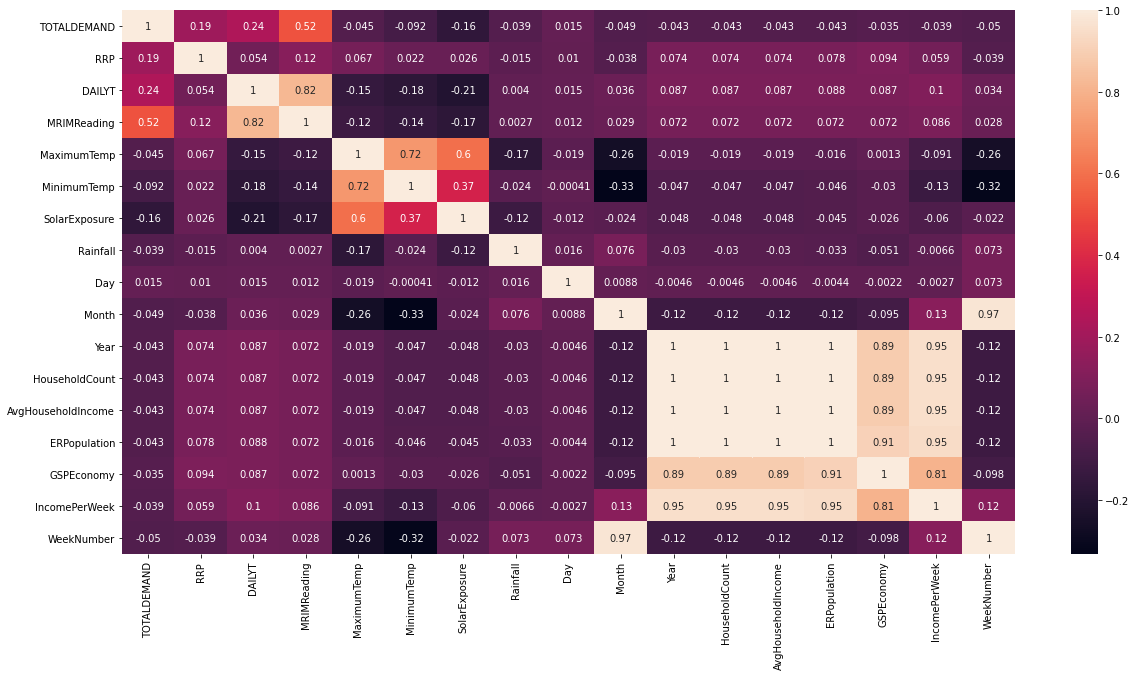

In [341]:
plt.figure(figsize=(20,10))
sns.heatmap(merged.corr(), annot = True)

In [342]:
# merged.to_csv('final.csv', index=False)

In [369]:
df = merged.drop(['ServiceProvider', 'DAILYT', 'MRIMReading', 'ProfileArea', 'Day', 'Month', 'Year', 'Date', 'Time'], axis = 1)
df = df.drop_duplicates().reset_index(drop=True)
df = df[~(df['SETTLEMENTDATE'] > '2020-10-05')][:-1]
df['ts'] = df.SETTLEMENTDATE.values.astype(np.int64) // 10 ** 9
# df = df.drop(['SETTLEMENTDATE'], axis = 1)
test = df.values
df

,SETTLEMENTDATE,TOTALDEMAND,RRP,MaximumTemp,MinimumTemp,SolarExposure,Rainfall,HouseholdCount,AvgHouseholdIncome,ERPopulation,...,PublicHoliday,DayOfWeek,WeekNumber,WeekTime,Season,SchoolHoliday,DayTime,LightCondition,IndustryHoliday,ts
0,2016-01-01 00:30:00,5197.34,35.52,24.2,19.8,22.0,0.0,2112701,1536.16,6173172,...,Yes,Friday,53,Weekday,Summer,Yes,Night,Dark,Yes,1451608200
1,2016-01-01 01:00:00,4934.54,38.29,24.2,19.8,22.0,0.0,2112701,1536.16,6173172,...,Yes,Friday,53,Weekday,Summer,Yes,Night,Dark,Yes,1451610000
2,2016-01-01 01:30:00,4721.32,29.30,24.2,19.8,22.0,0.0,2112701,1536.16,6173172,...,Yes,Friday,53,Weekday,Summer,Yes,Night,Dark,Yes,1451611800
3,2016-01-01 02:00:00,4541.24,31.28,24.2,19.8,22.0,0.0,2112701,1536.16,6173172,...,Yes,Friday,53,Weekday,Summer,Yes,Night,Dark,Yes,1451613600
4,2016-01-01 02:30:00,4344.18,23.87,24.2,19.8,22.0,0.0,2112701,1536.16,6173172,...,Yes,Friday,53,Weekday,Summer,Yes,Night,Dark,Yes,1451615400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83466,2020-10-04 21:30:00,4021.88,10.47,29.5,13.5,8.4,0.0,2280765,1717.83,6689000,...,No,Sunday,40,Weekend,Spring,Yes,Night,Dark,Yes,1601847000
83467,2020-10-04 22:00:00,3907.28,9.19,29.5,13.5,8.4,0.0,2280765,1717.83,6689000,...,No,Sunday,40,Weekend,Spring,Yes,Night,Dark,Yes,1601848800
83468,2020-10-04 22:30:00,3771.22,1.35,29.5,13.5,8.4,0.0,2280765,1717.83,6689000,...,No,Sunday,40,Weekend,Spring,Yes,Night,Dark,Yes,1601850600
83469,2020-10-04 23:00:00,3737.32,-0.48,29.5,13.5,8.4,0.0,2280765,1717.83,6689000,...,No,Sunday,40,Weekend,Spring,Yes,Night,Dark,Yes,1601852400


In [509]:
lb = LabelBinarizer()
dummies = pd.get_dummies(df)

df_train = df[df.SETTLEMENTDATE < '2020-03-16']
y_train = df_train.RRP.values
y_train = y_train.reshape(-1, 1)
y_train = StandardScaler().fit_transform(y_train)
y_train = y_train.reshape(-1,)
print(y_train)
# y_train = y_train.astype('int')
# X_train = df_train.drop(['SETTLEMENTDATE', 'RRP'], axis = 1)

X_train = dummies[dummies.SETTLEMENTDATE < '2020-03-16']
X_train = X_train.drop(['SETTLEMENTDATE', 'RRP', 'ts', 'SchoolHoliday_Yes', 'SchoolHoliday_No', 'IndustryHoliday_Yes', 'IndustryHoliday_No'], axis = 1)
# X_train = X_train.astype('int')
X_train = X_train.values
# X_train = lb.fit_transform(X_train)

X_train = StandardScaler().fit_transform(X_train)


df_test = df[df.SETTLEMENTDATE > '2020-03-15']
y_test = df_test.RRP.values
y_test = y_test.reshape(-1, 1)
y_test = StandardScaler().fit_transform(y_test)
y_test = y_test.reshape(-1,)
# y_test = y_test.astype('int')
# X_test = df_test.drop(['SETTLEMENTDATE', 'RRP'], axis = 1)

X_test = dummies[dummies.SETTLEMENTDATE > '2020-03-15']
X_test = X_test.drop(['SETTLEMENTDATE', 'RRP', 'ts', 'SchoolHoliday_Yes', 'SchoolHoliday_No', 'IndustryHoliday_Yes', 'IndustryHoliday_No'], axis = 1)
# X_test = X_test.astype('int')
X_test = X_test.values
# X_test = lb.fit_transform(X_test)

X_test = StandardScaler().fit_transform(X_test)


# lb = LabelBinarizer()
# y_train = lb.fit_transform(y_train)
# y_test = lb.transform(y_test)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [505]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[[ 0.26840811  0.52501879  1.80139826 ...  1.18323522  1.00001356
  -1.00001356]
 [-0.03237108  0.52501879  1.80139826 ...  1.18323522  1.00001356
  -1.00001356]
 [-0.27640509  0.52501879  1.80139826 ...  1.18323522  1.00001356
  -1.00001356]
 ...
 [-0.93047392 -0.33066429  0.17500327 ...  1.18323522  1.00001356
  -1.00001356]
 [-0.98236635 -0.33066429  0.17500327 ...  1.18323522  1.00001356
  -1.00001356]
 [-0.79908332 -0.33066429  0.17500327 ...  1.18323522  1.00001356
  -1.00001356]]
[[-0.72798381  0.45441187  1.04583373 ...  1.18336099  1.00010214
  -1.00010214]
 [-0.90037449  0.45441187  1.04583373 ...  1.18336099  1.00010214
  -1.00010214]
 [-1.01951022  0.45441187  1.04583373 ...  1.18336099  1.00010214
  -1.00010214]
 ...
 [-1.35575878  3.17387701  1.28123047 ...  1.18336099  1.00010214
  -1.00010214]
 [-1.39495425  3.17387701  1.28123047 ...  1.18336099  1.00010214
  -1.00010214]
 [-1.13768629  3.17387701  1.28123047 ...  1.18336099  1.00010214
  -1.00010214]]
[-0.18441716 -0.

In [418]:
# encoded = pd.get_dummies(df)

# scaler = StandardScaler()
# scaled = scaler.fit_transform(encoded.values)

# scaled

%matplotlib inline
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    print(y_train)
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
## Printing dimensions
print(X_train.shape, y_train.shape)
## Visualizing the first digit
plt.imshow(X_train[0], cmap="Greys");

## Changing dimension of input images from N*28*28 to N*784
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print(X_train)
print(X_test)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
## Changing labels to one-hot encoded vector
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)
y_train.shape
# y_test

## Importing required libraries
s = tf.InteractiveSession()

## Defining various initialization parameters for 784-512-256-10 MLP model
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 512
num_layers_1 = 256
starter_learning_rate = 0.001
regularizer_rate = 0.1

# Placeholders for the input data
tf.compat.v1.disable_eager_execution()
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')
## for dropout layer
keep_prob = tf.placeholder(tf.float32)

## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_output]))

## Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
predicted_y = tf.sigmoid(tf.matmul(hidden_output_1_1,weights_2) + bias_2)

## Defining the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,
                                                                         bias_0,bias_1,bias_2])

## Metrics definition
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(predicted_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Training parameters
batch_size = 128
epochs=14
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_y: y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_y: y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train,keep_prob:1}))
    
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(predicted_y, {input_X: X_test,keep_prob:1}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

## Plotting chart of training and testing accuracy as a function of iterations
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.show()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))

In [499]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
import pandas as pd

In [464]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

In [467]:
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [506]:
reg = MLPRegressor(hidden_layer_sizes=(512,256),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)

In [507]:
y_pred=reg.predict(X_test)
print("R2 Score", (r2_score(y_test, y_pred)))
mse = mean_squared_error(y_test, y_pred)
print("MSE", (np.sqrt(mse)))

R2 Score 0.06371729465886578
MSE 0.9676170241067146


In [ ]:
cal_housing

In [ ]:
X